In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
!pip install psycopg2

warnings.filterwarnings('ignore')

In [10]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [23]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,...,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,...,52524.0,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154


In [9]:
#what proportion of values are null for each column?
education_df.isnull().sum() * 100 / education_df.count()
#a lot!

PRIMARY_KEY                       0.000000
STATE                             0.000000
YEAR                              0.000000
ENROLL                           21.399512
TOTAL_REVENUE                    16.562500
FEDERAL_REVENUE                  16.562500
STATE_REVENUE                    16.562500
LOCAL_REVENUE                    16.562500
TOTAL_EXPENDITURE                16.562500
INSTRUCTION_EXPENDITURE          16.562500
SUPPORT_SERVICES_EXPENDITURE     16.562500
OTHER_EXPENDITURE                21.399512
CAPITAL_OUTLAY_EXPENDITURE       16.562500
GRADES_PK_G                      13.115997
GRADES_KG_G                       9.705882
GRADES_4_G                        9.625276
GRADES_8_G                        9.625276
GRADES_12_G                       9.625276
GRADES_1_8_G                      9.625276
GRADES_9_12_G                     9.625276
GRADES_ALL_G                     13.115997
AVG_MATH_4_SCORE                178.358209
AVG_MATH_8_SCORE                180.451128
AVG_READING

In [21]:
#we need to start filling in null values
#an interpolate call makes sense because the data is set up as a time series across years
to_be_filled = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]
states = education_df['STATE'].unique()
for state in states:
    education_df.loc[education_df['STATE']==state,to_be_filled] = education_df.loc[education_df['STATE']==state,to_be_filled].interpolate()

#drop remaining nulls
education_df.dropna(inplace=True)

### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [22]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


1. From the above output, we can see that average total expenditure is greater than average total revenue. This means that states on average run a deficit when it comes to education spending.
2. Students are scoring higher on math tests than on reading tests.
3. The government estimate for student enrollment (ENROLL) is higher than the number of students enrolled (GRADES_ALL_G).

### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [46]:
#grab all relevant arizona data
arizona_set = education_df.loc[education_df['STATE'] == 'ARIZONA',['TOTAL_REVENUE','TOTAL_EXPENDITURE','YEAR', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']]
arizona_set.head()

,TOTAL_REVENUE,TOTAL_EXPENDITURE,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
211,4143304.0,4391555.0,1996,217.575940,267.874834,206.529788,263.283638
418,5479168.0,5397194.0,2000,218.766619,270.715406,205.347275,270.519439
574,6529894.0,6210287.0,2003,228.911396,271.177350,208.872801,267.808967
678,7550109.0,7136794.0,2005,229.800673,274.305090,207.142737,264.947778
782,8724434.0,8709531.0,2007,231.936934,275.548426,209.520624,254.799747


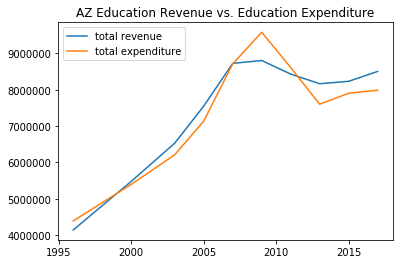

In [47]:
plt.plot(arizona_set['YEAR'], arizona_set['TOTAL_REVENUE'], label = 'total revenue')
plt.plot(arizona_set['YEAR'], arizona_set['TOTAL_EXPENDITURE'], label = 'total expenditure')
plt.legend()
plt.title('AZ Education Revenue vs. Education Expenditure')
plt.show()

Surprisingly, Arizona has been running an education surplus in recent years. State leadership constantly says that cuts need to be happening to balance the budget, but it would appear that education is in the green. The large deficit spanning from just after 2005 to right around 2010 is likely due to the market crash of 2008. Budget cuts have been happening in this state nearly every year, but, from the above graph, cutting education spending is unnecessary. Way to go, Arizona.

### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [48]:
arizona_set.describe()

,TOTAL_REVENUE,TOTAL_EXPENDITURE,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000
mean,7.455648e+06,7.352636e+06,2007.600000,230.449272,276.087679,210.370897,264.019508
std,1.574637e+06,1.601935e+06,6.719788,7.408038,5.076679,3.584302,5.369314
min,4.143304e+06,4.391555e+06,1996.000000,217.575940,267.874834,205.347275,254.799747
25%,6.784948e+06,6.441914e+06,2003.500000,229.133715,271.959285,207.575253,260.977128
50%,8.197416e+06,7.751590e+06,2008.000000,230.964019,276.440354,209.754947,264.115708
75%,8.484572e+06,8.454566e+06,2012.500000,234.977145,279.550076,212.949361,267.648482
max,8.802515e+06,9.580393e+06,2017.000000,240.304911,282.919489,215.465952,270.966172


From the above overview, it would appear that Arizona students are scoring higher on the NAEP math test than on the NAEP reading test. We can do a more descriptive breakdown below.

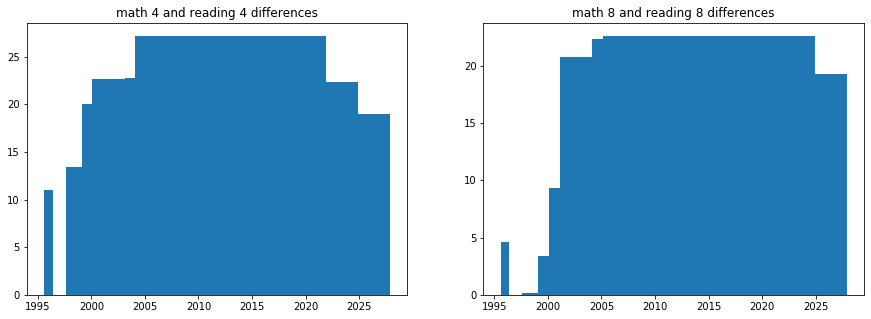

In [54]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(arizona_set['YEAR'], arizona_set['AVG_MATH_4_SCORE'] - arizona_set['AVG_READING_4_SCORE'])
plt.title('math 4 and reading 4 differences')
plt.subplot(1,2,2)
plt.bar(arizona_set['YEAR'], arizona_set['AVG_MATH_8_SCORE'] - arizona_set['AVG_READING_8_SCORE'])
plt.title('math 8 and reading 8 differences')
plt.show();

In [57]:
print('Differences between average math 4 score and average reading 4 score')
print(arizona_set['AVG_MATH_4_SCORE'] - arizona_set['AVG_READING_4_SCORE'])
print('Differences between average math 8 score and average reading 8 score')
print(arizona_set['AVG_MATH_8_SCORE'] - arizona_set['AVG_READING_8_SCORE'])

Differences between average math 4 score and average reading 4 score
211     11.046152
418     13.419344
574     20.038595
678     22.657936
782     22.416309
889     20.001836
995     22.762547
1099    27.170780
1201    22.300419
1449    18.969836
dtype: float64
Differences between average math 8 score and average reading 8 score
211      4.591197
418      0.195967
574      3.368384
678      9.357312
782     20.748679
889     10.165252
995      8.067329
1099    22.294430
1201    22.602471
1449    19.290689
dtype: float64


The graphs and raw calculations above confirm that each year students are scoring higher on average on the NAEP math test than they are on the NAEP reading test. The difference each year is always within 30 points, but students are always performing better on math than on reading. A point of further investigation may be the very small different in Math 8 and Reading 8 scores in 2000.

### 4. What are the distributions of the math and reading scores in the sample?

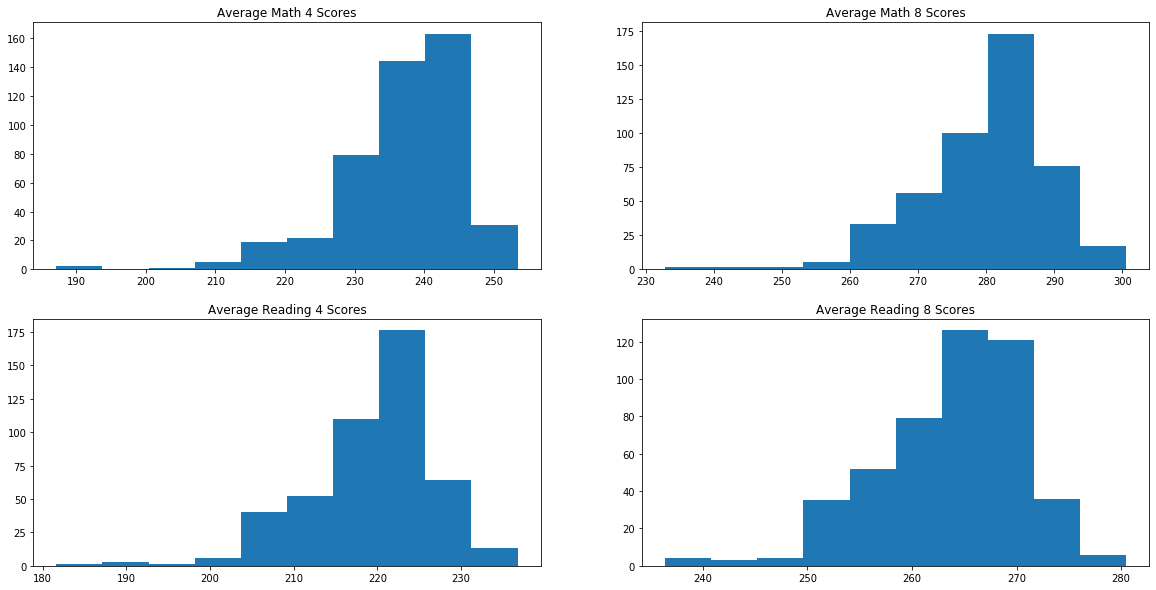

In [61]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.title('Average Math 4 Scores')
plt.hist(education_df['AVG_MATH_4_SCORE'].dropna())
plt.subplot(2,2,2)
plt.title('Average Math 8 Scores')
plt.hist(education_df['AVG_MATH_8_SCORE'].dropna())
plt.subplot(2,2,3)
plt.title('Average Reading 4 Scores')
plt.hist(education_df['AVG_READING_4_SCORE'].dropna())
plt.subplot(2,2,4)
plt.title('Average Reading 8 Scores')
plt.hist(education_df['AVG_READING_8_SCORE'].dropna())
plt.show();

Each of the above distributions appear to be skewed to the left (median is greater than mean). We can verify this by using `stats.describe`

In [64]:
from scipy import stats
print(stats.describe(education_df['AVG_MATH_4_SCORE']))
print(stats.describe(education_df['AVG_MATH_8_SCORE']))
print(stats.describe(education_df['AVG_READING_4_SCORE']))
print(stats.describe(education_df['AVG_READING_8_SCORE']))

DescribeResult(nobs=466, minmax=(187.134669958413, 253.420961133202), mean=236.90972805757056, variance=75.6187286658022, skewness=-1.4275679772741279, kurtosis=3.8700049091284052)
DescribeResult(nobs=466, minmax=(232.831509532896, 300.568235011147), mean=279.80266761824674, variance=88.01275402935737, skewness=-1.137062869375656, kurtosis=2.707949400304562)
DescribeResult(nobs=466, minmax=(181.626990470712, 236.773866580369), mean=219.50863788313958, variance=55.15358330307829, skewness=-1.0214822558223735, kurtosis=2.240967581141109)
DescribeResult(nobs=466, minmax=(236.379101763314, 280.499129965249), mean=263.7899430521787, variance=47.27424502431832, skewness=-0.8581914842255666, kurtosis=1.0994749216315283)


Average Reading 4 and Average Reading 8 are actually both within the acceptable skewness and kurtosis ranges to be considered normal. Average Math 4 and Average Math 8, however, fall outside of those ranges and cannot be considered to be normally distributed.

### 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

Unfortunately, we have already tinkered with our initial dataset so that it no longer holds missing values. We can redo our initial calls to get our original dataset.

In [65]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [70]:
education_df.isnull().sum()
# we have a lot of null values for average test scores

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

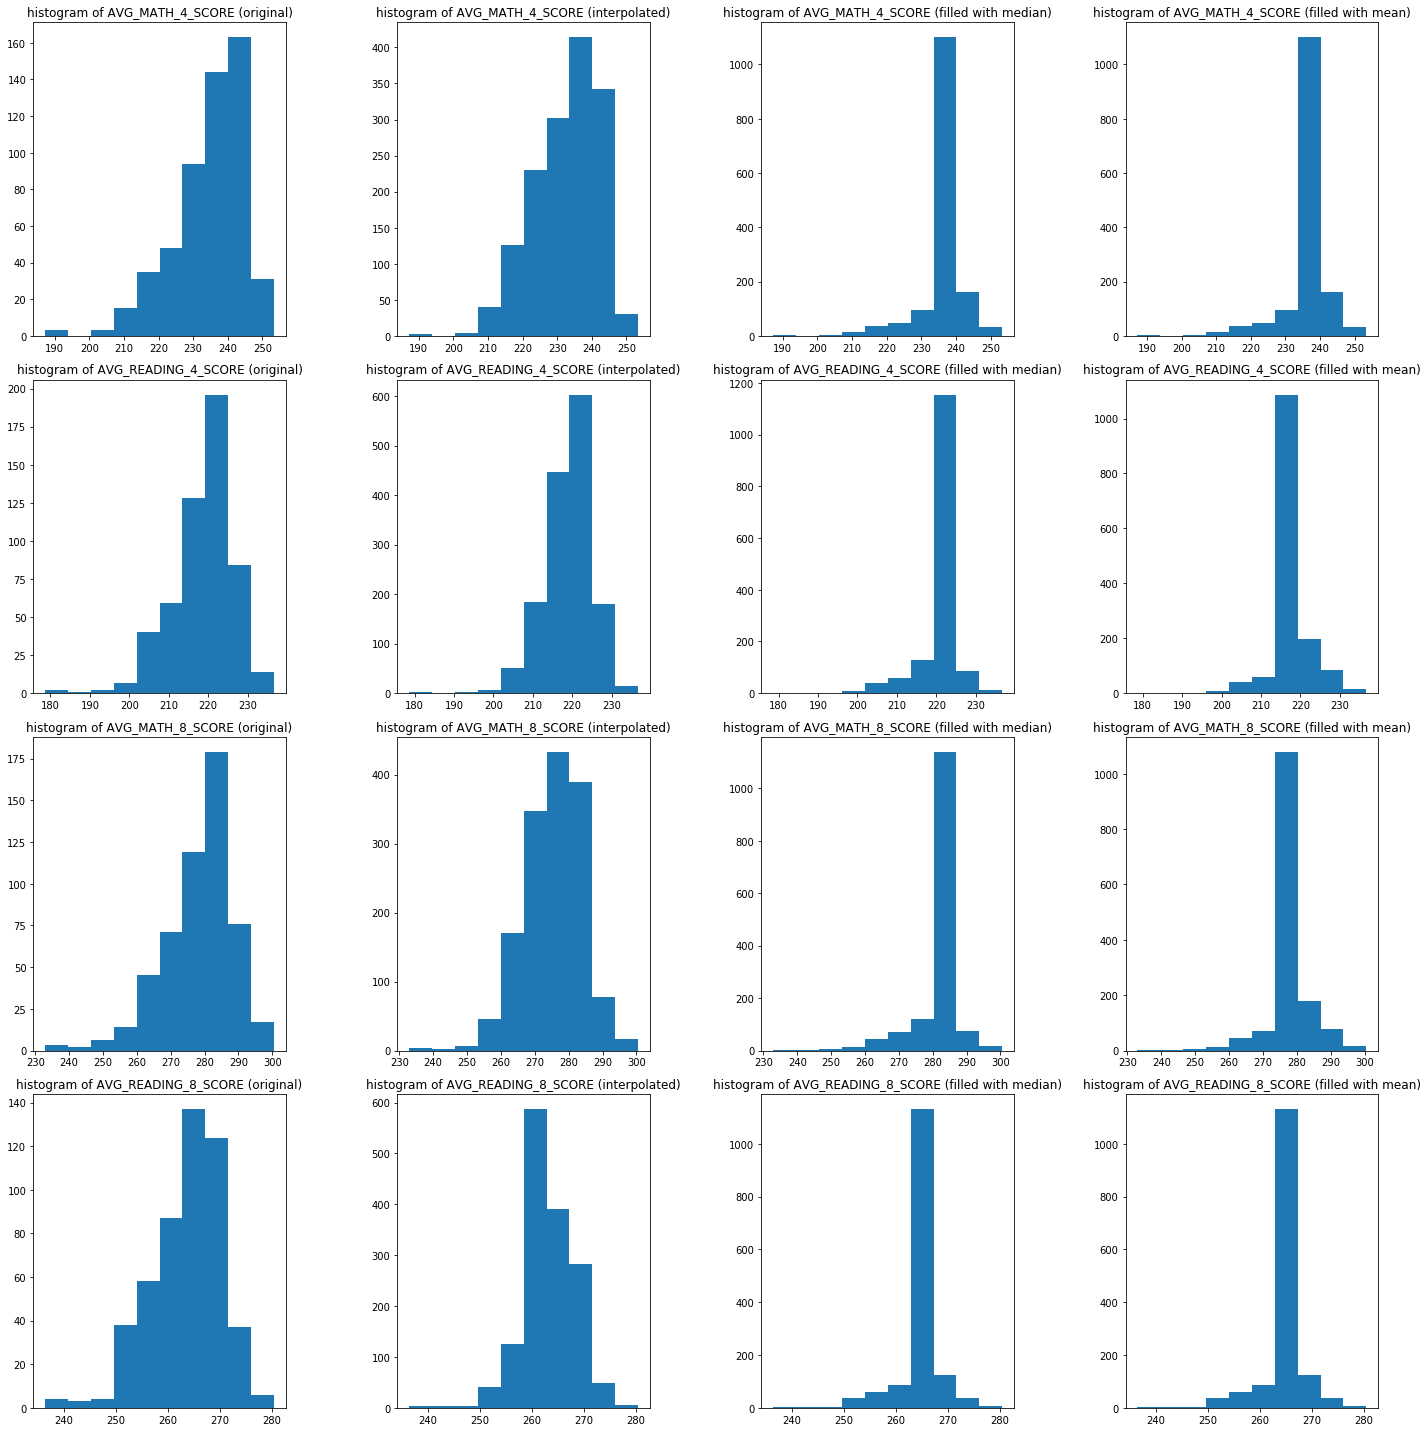

In [69]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(education_df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(education_df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(education_df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))


plt.subplot(4,4,13)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(education_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()

The above plots show the results of different ways of filling in null values. Unsurprisingly, interpolation best preserves the original structure of the data frame. Using median and mean to fill values leads to high peaks at each respective value. 

With large enough datasets, it may not make sense to try to fill missing values if dropping them still leaves a large amount of data. In this case, since we are working with under 1500 total entries, we do not want to drop nearly 1000 data points from our investigation.